<a href="https://colab.research.google.com/github/ShirleyHan6/CE9010-Group-Project/blob/master/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/open?id=1FdLlJ1RB77dF4kSzSWF9WXmoDZx5bdPL'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1FdLlJ1RB77dF4kSzSWF9WXmoDZx5bdPL


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('github_issues.csv')  

# Dataset is now stored in a Pandas Dataframe

In [0]:
import pandas as pd
import logging
import glob
pd.set_option('display.max_colwidth', 500)
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [0]:
df = pd.read_csv('github_issues.csv').sample(n=1000)

In [10]:
df.head(5)

,issue_url,issue_title,body
1058788,"""https://github.com/sydneyseoexpert/SEO/issues/626""",why linkbuilding is your website's best friend for small business seo via @justincherring https://t.co/uuqh5w9u08,<blockquote class= twitter-tweet >\n<p lang= en dir= ltr xml:lang= en >why <a href= https://twitter.com/hashtag/linkbuilding?src=hash > linkbuilding</a> is your website's best friend for small business <a href= https://twitter.com/hashtag/seo?src=hash > seo</a> via <a href= https://twitter.com/justincherring >@justincherring</a> <a href= https://t.co/efxhq1uhav >https://t.co/efxhq1uhav</a> <a href= https://t.co/w84h0mfryu >http://pic.twitter.com/w84h0mfryu</a></p>\n&mdash; mark bouncy media ...
2410444,"""https://github.com/GameHackingDotOrg/Project_Artemis/issues/10""",artemis for android - upload artemis logo,this is necessary for the android skeleton apk.
335477,"""https://github.com/micheleg/dash-to-dock/issues/594""",suggestion: on clicking dock item opened apps.,"when there is 2 or more app window opened on the dock, then when you click it will switch the apps, active window. i think it nice to have, if there is only single window of the app opened, then when you click it on the dock, the app will just minimize or maximize. because it is faster/easier to reach that instead clicking on the minimize button of the app. thank you"
1440505,"""https://github.com/linfaxin/AndroidUIX/issues/11""",how to develop androiduix app in kotlin. instuction,1.install ts2kt https://github.com/kotlin/ts2kt 2.converter of android-ui.d.ts to kotlin declarations stubs 3.dev in kotlin your app. 4.build kotlinjs project. wait bug fixed https://github.com/kotlin/ts2kt/issues/53
4268386,"""https://github.com/artsy/force-merge/issues/5""",test in eigen,from the top of my head we mainly need to adjust the hostnames in eigen so that the right pages are hijacked correctly.


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from os import listdir
import string
from keras.models import Model

from os import listdir
import string

from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
title_raw = df['issue_title'].tolist()
body_raw = df['body'].tolist()

In [59]:
print(title_raw[100])
print(body_raw[100])

action required: greenkeeper could not be activated 🚨
🚨 you need to enable continuous integration on all branches of this repository. 🚨 to enable greenkeeper, you need to make sure that a commit status https://help.github.com/articles/about-statuses/ is reported on all branches. this is required by greenkeeper because it uses your ci build statuses to figure out when to notify you about breaking changes. since we didn’t receive a ci status on the greenkeeper/initial https://github.com/node-ffi-napi/weak-napi/commits/greenkeeper/initial branch, it’s possible that you don’t have ci set up yet. we recommend using travis ci https://travis-ci.org , but greenkeeper will work with every other ci service as well. if you _have_ already set up a ci for this repository, you might need to check how it’s configured. make sure it is set to run on all new branches. if you don’t want it to run on absolutely every branch, you can whitelist branches starting with greenkeeper/ . once you have installed a

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
#tokenization
title_token = [word_tokenize(x) for x in title_raw]
body_token = [word_tokenize(x) for x in body_raw]

In [55]:
print(title_token[100])
print(body_token[100])

['action', 'required', ':', 'greenkeeper', 'could', 'not', 'be', 'activated']
['you', 'need', 'to', 'enable', 'continuous', 'integration', 'on', 'all', 'branches', 'of', 'this', 'repository', '.', 'to', 'enable', 'greenkeeper', ',', 'you', 'need', 'to', 'make', 'sure', 'that', 'a', 'commit', 'status', 'https', ':', '//help.github.com/articles/about-statuses/', 'is', 'reported', 'on', 'all', 'branches', '.', 'this', 'is', 'required', 'by', 'greenkeeper', 'because', 'it', 'uses', 'your', 'ci', 'build', 'statuses', 'to', 'figure', 'out', 'when', 'to', 'notify', 'you', 'about', 'breaking', 'changes', '.', 'since', 'we', 'didnt', 'receive', 'a', 'ci', 'status', 'on', 'the', 'greenkeeper/initial', 'https', ':', '//github.com/node-ffi-napi/weak-napi/commits/greenkeeper/initial', 'branch', ',', 'its', 'possible', 'that', 'you', 'dont', 'have', 'ci', 'set', 'up', 'yet', '.', 'we', 'recommend', 'using', 'travis', 'ci', 'https', ':', '//travis-ci.org', ',', 'but', 'greenkeeper', 'will', 'work', '

In [0]:
#clean up 
i = 0
title_clean = [None]*len(title_token)
for x in title_token:
    title_clean[i] = [y for y in x if y.isalpha()]
    i = i+1

i = 0    
body_clean = [None]*len(body_token)
for x in body_token:
    body_clean[i] = [y for y in x if y.isalpha()]
    i = i+1

In [69]:
print(title_clean[100])
print(body_clean[100])

['action', 'required', 'greenkeeper', 'could', 'not', 'be', 'activated']
['you', 'need', 'to', 'enable', 'continuous', 'integration', 'on', 'all', 'branches', 'of', 'this', 'repository', 'to', 'enable', 'greenkeeper', 'you', 'need', 'to', 'make', 'sure', 'that', 'a', 'commit', 'status', 'https', 'is', 'reported', 'on', 'all', 'branches', 'this', 'is', 'required', 'by', 'greenkeeper', 'because', 'it', 'uses', 'your', 'ci', 'build', 'statuses', 'to', 'figure', 'out', 'when', 'to', 'notify', 'you', 'about', 'breaking', 'changes', 'since', 'we', 'didnt', 'receive', 'a', 'ci', 'status', 'on', 'the', 'https', 'branch', 'its', 'possible', 'that', 'you', 'dont', 'have', 'ci', 'set', 'up', 'yet', 'we', 'recommend', 'using', 'travis', 'ci', 'https', 'but', 'greenkeeper', 'will', 'work', 'with', 'every', 'other', 'ci', 'service', 'as', 'well', 'if', 'you', 'already', 'set', 'up', 'a', 'ci', 'for', 'this', 'repository', 'you', 'might', 'need', 'to', 'check', 'how', 'its', 'configured', 'make', 'su

In [0]:
#remove stop words
i = 0
title_filtered = [None]*len(title_token)
for x in title_clean:
    title_filtered[i] = [y for y in x if y not in stopwords.words()]
    i = i+1

i = 0    
body_filtered = [None]*len(body_token)
for x in body_clean:
    body_filtered[i] = [y for y in x if y not in stopwords.words()]
    i = i+1

In [74]:
print(title_filtered[100])
print(body_filtered[100])

['action', 'required', 'greenkeeper', 'could', 'activated']
['need', 'enable', 'continuous', 'integration', 'branches', 'repository', 'enable', 'greenkeeper', 'need', 'make', 'sure', 'commit', 'status', 'https', 'reported', 'branches', 'required', 'greenkeeper', 'uses', 'build', 'statuses', 'figure', 'notify', 'breaking', 'changes', 'since', 'didnt', 'receive', 'status', 'https', 'branch', 'possible', 'dont', 'set', 'yet', 'recommend', 'using', 'travis', 'https', 'greenkeeper', 'work', 'every', 'service', 'well', 'already', 'set', 'repository', 'might', 'need', 'check', 'configured', 'make', 'sure', 'set', 'run', 'new', 'branches', 'dont', 'run', 'absolutely', 'every', 'branch', 'whitelist', 'branches', 'starting', 'installed', 'configured', 'repository', 'correctly', 'youll', 'need', 'greenkeepers', 'initial', 'pull', 'request', 'please', 'delete', 'branch', 'repository', 'remove', 'repository', 'greenkeeper', 'apps', 'white', 'list', 'github', 'find', 'list', 'repo', 'organizations',

In [0]:
#stemming
stemmer = PorterStemmer()

i = 0
title_stemmed = [None]*len(title_token)
for x in title_filtered:
    title_stemmed[i] = [stemmer.stem(y) for y in x]
    i = i+1

i = 0    
body_stemmed = [None]*len(body_token)
for x in body_filtered:
    body_stemmed[i] = [stemmer.stem(y) for y in x]
    i = i+1

In [76]:
print(title_stemmed[100])
print(body_stemmed[100])

['action', 'requir', 'greenkeep', 'could', 'activ']
['need', 'enabl', 'continu', 'integr', 'branch', 'repositori', 'enabl', 'greenkeep', 'need', 'make', 'sure', 'commit', 'statu', 'http', 'report', 'branch', 'requir', 'greenkeep', 'use', 'build', 'status', 'figur', 'notifi', 'break', 'chang', 'sinc', 'didnt', 'receiv', 'statu', 'http', 'branch', 'possibl', 'dont', 'set', 'yet', 'recommend', 'use', 'travi', 'http', 'greenkeep', 'work', 'everi', 'servic', 'well', 'alreadi', 'set', 'repositori', 'might', 'need', 'check', 'configur', 'make', 'sure', 'set', 'run', 'new', 'branch', 'dont', 'run', 'absolut', 'everi', 'branch', 'whitelist', 'branch', 'start', 'instal', 'configur', 'repositori', 'correctli', 'youll', 'need', 'greenkeep', 'initi', 'pull', 'request', 'pleas', 'delet', 'branch', 'repositori', 'remov', 'repositori', 'greenkeep', 'app', 'white', 'list', 'github', 'find', 'list', 'repo', 'organ', 'page', 'github']


In [0]:
#join sentence
i = 0
title_final = ['']*len(title_token)
for x in title_stemmed:
    title_final[i]= title_final[i] + ' ' + ' '.join(x)
    i = i+1

i = 0    
body_final = ['']*len(body_token)
for x in body_stemmed:
    body_final[i]= body_final[i] + ' ' + ' '.join(x)
    i = i+1

In [86]:
print(title_final[100])
print(body_final[100])

 action requir greenkeep could activ
 need enabl continu integr branch repositori enabl greenkeep need make sure commit statu http report branch requir greenkeep use build status figur notifi break chang sinc didnt receiv statu http branch possibl dont set yet recommend use travi http greenkeep work everi servic well alreadi set repositori might need check configur make sure set run new branch dont run absolut everi branch whitelist branch start instal configur repositori correctli youll need greenkeep initi pull request pleas delet branch repositori remov repositori greenkeep app white list github find list repo organ page github


In [0]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import random

In [96]:
issue_number = random.randint(1,1000)
print(issue_number)

image_story = WordCloud(width= 800,
                  height= 800,
                  background_color='white',
                  max_words=20).generate(title_final[issue_number])

image_highlight = WordCloud(width= 800,
                  height= 800,
                  background_color='white',
                  max_words=20).generate(body_final[issue_number])

220


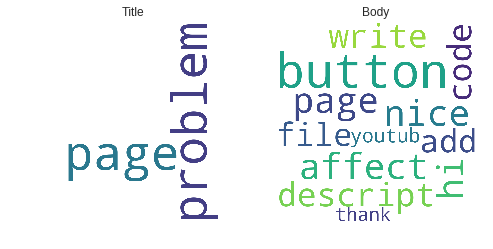

In [97]:
plt.subplot(1, 2, 1).set_title("Title")
plt.imshow(image_story)
plt.axis("off")

plt.subplot(1, 2, 2).set_title("Body")
plt.imshow(image_highlight)
plt.axis("off")

plt.show()